In [40]:
from alpha_vantage.timeseries import TimeSeries
import pandas

api_key = 'Y3CYFY9T7LY6LY6S'


ts = TimeSeries(key = api_key, output_format = 'pandas')

df, meta_data = ts.get_daily(symbol = 'GOOG', outputsize = 'full')

print(df.head())


            1. open  2. high   3. low  4. close   5. volume
date                                                       
2025-05-05  164.515  167.100  164.470    166.05  15309343.0
2025-05-02  164.955  166.700  163.660    165.81  16844937.0
2025-05-01  162.520  163.940  160.930    162.79  21904291.0
2025-04-30  159.860  161.374  157.155    160.89  20639520.0
2025-04-29  162.045  162.680  159.390    162.06  15955215.0


In [41]:
df.tail()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2014-04-02,565.106,604.83,562.19,567.00,146700.0
2014-04-01,558.710,568.45,558.71,567.16,7900.0
2014-03-31,566.890,567.00,556.93,556.97,10800.0
2014-03-28,561.200,566.43,558.67,559.99,41100.0
2014-03-27,568.000,568.00,552.92,558.46,13100.0


In [42]:
df.rename(columns= {'1. open': 'Open', '2. high': 'high', '3. low': 'low', '4. close': 'Close', '5. volume': 'Volume'}, inplace= True)

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import yfinance as yf

In [44]:
# start = '2014-01-01'
# end = '2025-03-21'
# stack= 'GOOG'

# data = yf.download(stack, start, end, threads=False)

In [45]:
data = df
data.head()

,Open,high,low,Close,Volume
date,,,,,
2025-05-05,164.515,167.100,164.470,166.05,15309343.0
2025-05-02,164.955,166.700,163.660,165.81,16844937.0
2025-05-01,162.520,163.940,160.930,162.79,21904291.0
2025-04-30,159.860,161.374,157.155,160.89,20639520.0
2025-04-29,162.045,162.680,159.390,162.06,15955215.0


In [46]:
data.shape

(2794, 5)

In [47]:
data.reset_index(inplace= True)
data

,date,Open,high,low,Close,Volume
0,2025-05-05,164.515,167.100,164.470,166.05,15309343.0
1,2025-05-02,164.955,166.700,163.660,165.81,16844937.0
2,2025-05-01,162.520,163.940,160.930,162.79,21904291.0
3,2025-04-30,159.860,161.374,157.155,160.89,20639520.0
4,2025-04-29,162.045,162.680,159.390,162.06,15955215.0
...,...,...,...,...,...,...
2789,2014-04-02,565.106,604.830,562.190,567.00,146700.0
2790,2014-04-01,558.710,568.450,558.710,567.16,7900.0
2791,2014-03-31,566.890,567.000,556.930,556.97,10800.0
2792,2014-03-28,561.200,566.430,558.670,559.99,41100.0


In [48]:
data.columns

Index(['date', 'Open', 'high', 'low', 'Close', 'Volume'], dtype='object')

In [49]:
# data.columns = [col[0] for col in data.columns]
# data.head()

In [50]:
# Moving average of 100 days
ma_100_days = data.Close.rolling(100).mean()

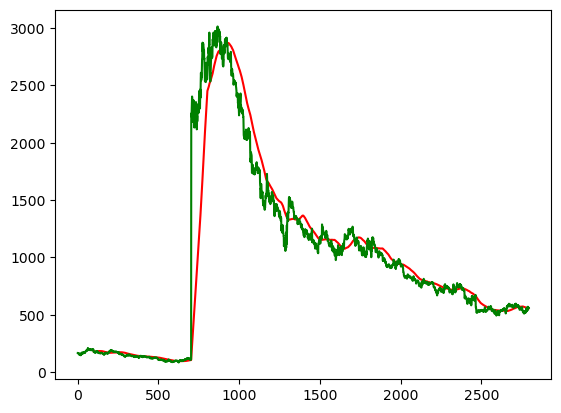

In [51]:
plt.Figure(figsize= (8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [52]:
ma_200_days = data.Close.rolling(200).mean()

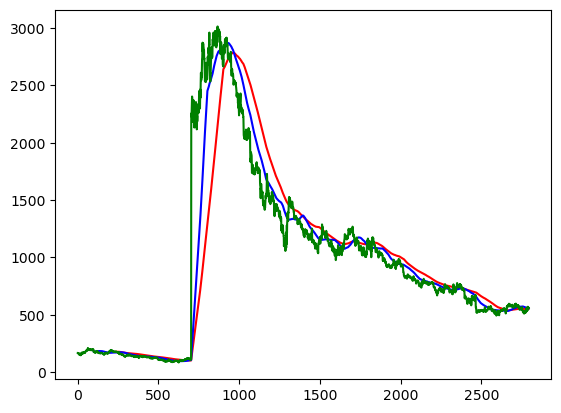

In [53]:
plt.Figure(figsize= (8, 6))
plt.plot(ma_200_days, 'r')
plt.plot(ma_100_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2794 entries, 0 to 2793
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2794 non-null   datetime64[ns]
 1   Open    2794 non-null   float64       
 2   high    2794 non-null   float64       
 3   low     2794 non-null   float64       
 4   Close   2794 non-null   float64       
 5   Volume  2794 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 131.1 KB


In [55]:
data_train = pd.DataFrame(data.Close[0: int(len(data) * 0.80)])
data_test = pd.DataFrame(data.Close[int(len(data) * 0.80): len(data)])

In [56]:
print(data_train.shape); print(data_test.shape)

(2235, 1)
(559, 1)


In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))

In [58]:
data_train_scale = scaler.fit_transform(data_train)

In [59]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100: i])
    y.append(data_train_scale[i, 0])

In [60]:
x, y = np.array(x), np.array(y)

In [61]:
from keras.layers import  Dense, Dropout, LSTM
from keras.models import Sequential

In [62]:
model = Sequential()
model.add(LSTM(units= 50, activation= 'relu' , return_sequences= True,
               input_shape = ((x.shape[1], 1))))
model.add(Dropout(0.2))

model.add(LSTM(units= 60, activation= 'relu' , return_sequences= True ))
model.add(Dropout(0.3))

model.add(LSTM(units= 80, activation= 'relu' , return_sequences= True ))
model.add(Dropout(0.4))

model.add(LSTM(units= 120, activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units= 1))

C:\Users\sanja\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [63]:
model.compile(optimizer= 'adam', loss= 'mean_squared_error')

In [64]:
model.fit(x, y, epochs= 50, batch_size= 32, verbose= 1)

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - loss: 0.0799
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - loss: 0.0084
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - loss: 0.0087
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - loss: 0.0098
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - loss: 0.0076
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - loss: 0.0074
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 168ms/step - loss: 0.0071
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 157ms/step - loss: 0.0063
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 165ms/step - loss: 0.0057
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 159ms/step - loss: 0.0054
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 141ms/step - loss: 0.0054
Epoch 12/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - loss: 0.0055
Epoch 13/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 159ms/step - loss: 0.0054
Epoch 14/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - loss: 0.0042
Epoch 15/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 164ms/

In [65]:
past_100_days = data_train.tail(100)

In [66]:
data_test = pd.concat([past_100_days, data_test], ignore_index = True)
data_test.shape

(659, 1)

In [67]:
data_test_scale = scaler.fit_transform(data_test)

In [68]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100: i])
    y.append(data_test_scale[i, 0])

x, y = np.array(x), np.array(y)

In [69]:
y_predict = model.predict(x)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


In [70]:
scale = 1/scaler.scale_


In [71]:
y_predict  = y_predict * scale

In [72]:
y_predict.shape

(559, 1)

In [73]:
y = y * scale

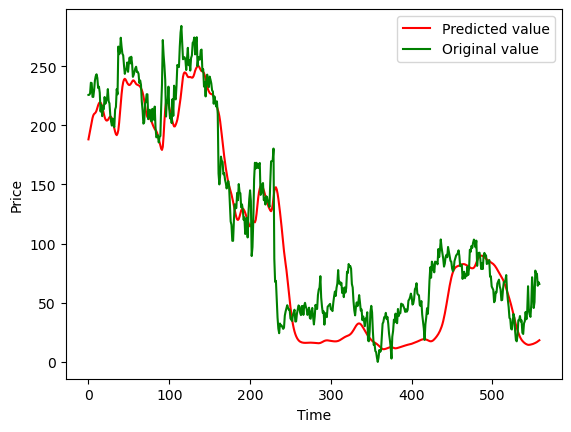

In [74]:
plt.Figure(figsize= (8,8))
plt.plot(y_predict, 'r', label = "Predicted value")
plt.plot(y , 'g', label = "Original value")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [75]:
y_predict.shape

(559, 1)

In [76]:
model.save("Stock_Prediction_model.keras")